In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

#following the tutorial from https://towardsdatascience.com/image-pre-processing-c1aec0be3edf to understand
#how to preprocess data. All credit to this blog post. I did hyper paramter tunning to understand the affects of
#some of the paramters although the best result was from the blog post.


In [4]:
# defining global variable path

image_path = "./images"


def loadImages(path):
#    Put files into lists and return them as one list with all images in the folder
    image_files = sorted([os.path.join(path, 'train', file)
                          for file in os.listdir(path + "/train")
                          if file.endswith('.jpg')])
    return image_files

In [5]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()

In [6]:
# Preprocessing
def processing(data):
    
    # Reading 3 images
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
   
    # resizing the images to all be the same size as for cnn's to work, the images need to be formated in the same
    #square dimensions
    height = 320
    width = 320
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)

    # Remove noise, Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[1]
    display(original, image, 'Original', 'Blured')

    # Segmentation
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Displaying segmented images
    display(original, thresh, 'Original', 'Segmented')
    # Further noise removal (Morphology)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    #Displaying segmented back ground
    display(original, sure_bg, 'Original', 'Segmented Background')

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]

    # Displaying markers on the image
    display(original, markers, 'Original', 'Marked')

List of files the first 3 in the folder:
 ['./images\\train\\26456036.jpg', './images\\train\\26457961.jpg', './images\\train\\26457966.jpg']
--------------------------------
Original size (511, 909, 3)
RESIZED (320, 320, 3)


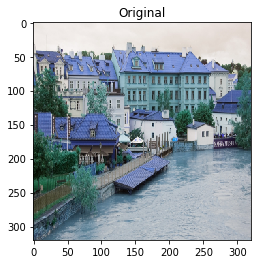

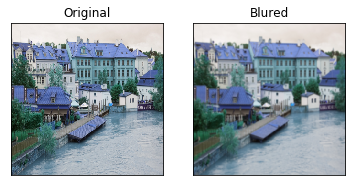

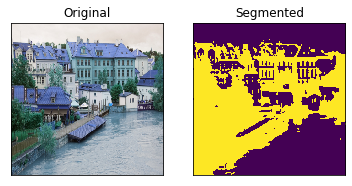

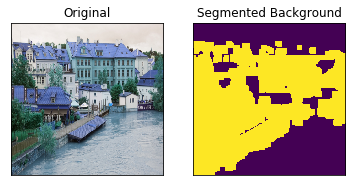

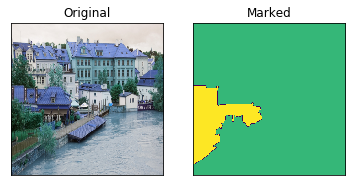

In [7]:
def main():
    # calling global variable
    global image_path
  #  The var Dataset is a list with all images in the folder
    dataset = loadImages(image_path)
    
    print("List of files the first 3 in the folder:\n",dataset[:3])
    print("--------------------------------")
    
    # sending all the images to pre-processing
    processing(dataset)
   

  
main()

In [10]:
# Preprocessing
def processing2(data):
    
    # Reading 3 images
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
   
    # resizing the images to all be the same size as for cnn's to work, the images need to be formated in the same
    #square dimensions
    height = 220
    width = 220
    dim = (width, height) #dimensions
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_AREA)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)

    # Remove noise, Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (3, 3), 0)
        no_noise.append(blur)


    image = no_noise[1]
    display(original, image, 'Original', 'Blured')

    # Segmentation
#    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    ret, thresh = cv2.threshold(rgb, 12, 255, cv2.THRESH_BINARY)

    # Displaying segmented images
    display(original, thresh, 'Original', 'Segmented')
    # Further noise removal (Morphology)
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=5)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=8)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    #Displaying segmented back ground
    display(original, sure_bg, 'Original', 'Segmented Background')

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]

    # Displaying markers on the image
    display(original, markers, 'Original', 'Marked')

List of files the first 3 in the folder:
 ['./images\\train\\26456036.jpg', './images\\train\\26457961.jpg', './images\\train\\26457966.jpg']
--------------------------------
Original size (511, 909, 3)
RESIZED (220, 220, 3)


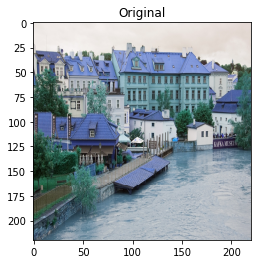

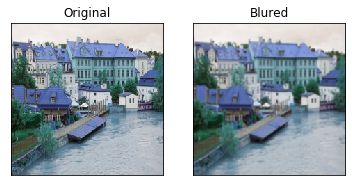

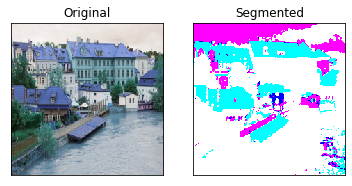

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\distransform.cpp:724: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::distanceTransform'


In [11]:
def main2():
    # calling global variable
    global image_path
  #  The var Dataset is a list with all images in the folder
    dataset = loadImages(image_path)
    
    print("List of files the first 3 in the folder:\n",dataset[:3])
    print("--------------------------------")
    
    # sending all the images to pre-processing
    processing2(dataset)
   

  
main2()

In [14]:
# Preprocessing
def processing2(data):
    
    # Reading 3 images
    img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    try:
        print('Original size',img[0].shape)
    except AttributeError:
        print("shape not found")
   
    # resizing the images to all be the same size as for cnn's to work, the images need to be formated in the same
    #square dimensions
    height = 220
    width = 220
    dim = (width, height) #dimensions
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_AREA)
        res_img.append(res)

    # Checcking the size
    try:
        print('RESIZED', res_img[1].shape)
    except AttributeError:
        print("shape not found")
    
    
    # Visualizing one of the images in the array
    original = res_img[1]
    display_one(original)

    # Remove noise, Using Gaussian Blur
    no_noise = []
    for i in range(len(res_img)):
        blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
        no_noise.append(blur)


    image = no_noise[1]
    display(original, image, 'Original', 'Blured')

    # Segmentation
#    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(rgb, 12, 255, cv2.THRESH_BINARY)

    # Displaying segmented images
    display(original, thresh, 'Original', 'Segmented')
    # Further noise removal (Morphology)
    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_GRADIENT, kernel, iterations=5)

    # sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=8)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    #Displaying segmented back ground
    display(original, sure_bg, 'Original', 'Segmented Background')

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers + 1

    # Now, mark the region of unknown with zero
    markers[unknown == 255] = 0

    markers = cv2.watershed(image, markers)
    image[markers == -1] = [255, 0, 0]

    # Displaying markers on the image
    display(original, markers, 'Original', 'Marked')

List of files the first 3 in the folder:
 ['./images\\train\\26456036.jpg', './images\\train\\26457961.jpg', './images\\train\\26457966.jpg']
--------------------------------
Original size (511, 909, 3)
RESIZED (220, 220, 3)


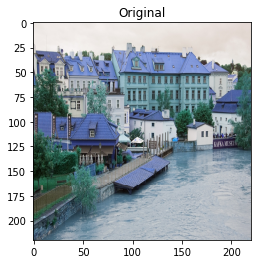

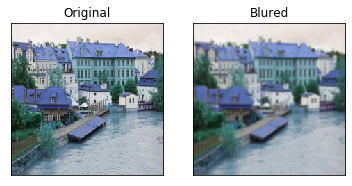

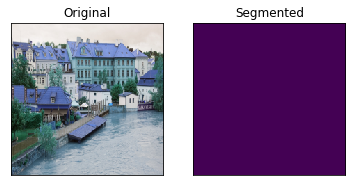

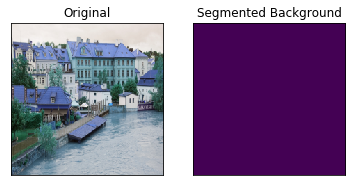

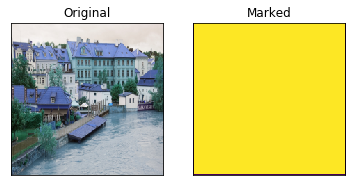

In [15]:
def main2():
    # calling global variable
    global image_path
  #  The var Dataset is a list with all images in the folder
    dataset = loadImages(image_path)
    
    print("List of files the first 3 in the folder:\n",dataset[:3])
    print("--------------------------------")
    
    # sending all the images to pre-processing
    processing2(dataset)
   

  
main2()